In [1]:
import os
import pandas as pd

In [2]:
df = pd.read_csv('D:\\BCU Final\\ML\\Dataset\\Wesad Acc\\datasrc\\combined.csv')

In [3]:
df

,chest_acc_x,chest_acc_y,chest_acc_z,chest_ecg,chest_res,chest_temp,label,Subject ID
0,0.7674,0.4226,1.7662,0.020096,2.120972,33.520264,0.0,Subject 11
1,0.7326,0.2878,1.7234,0.036850,2.113342,33.494537,0.0,Subject 11
2,0.6894,0.1146,1.5550,0.053650,2.122498,33.508148,0.0,Subject 11
3,0.6646,-0.0626,1.3322,0.052780,2.125549,33.491516,0.0,Subject 11
4,0.6590,-0.2322,1.0834,0.035751,2.131653,33.524780,0.0,Subject 11
...,...,...,...,...,...,...,...,...
16984095,0.9150,-0.0078,-0.0558,-0.022842,0.733948,35.528717,0.0,Subject 8
16984096,0.9160,-0.0082,-0.0586,-0.024216,0.730896,35.519409,0.0,Subject 8
16984097,0.9138,-0.0050,-0.0602,-0.021835,0.727844,35.432373,0.0,Subject 8
16984098,0.9138,-0.0058,-0.0586,-0.016296,0.703430,35.547394,0.0,Subject 8


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16984100 entries, 0 to 16984099
Data columns (total 8 columns):
 #   Column       Dtype  
---  ------       -----  
 0   chest_acc_x  float64
 1   chest_acc_y  float64
 2   chest_acc_z  float64
 3   chest_ecg    float64
 4   chest_res    float64
 5   chest_temp   float64
 6   label        float64
 7   Subject ID   object 
dtypes: float64(7), object(1)
memory usage: 1.0+ GB


### Adding a Gender Feature 

In [5]:
df['Subject ID'] = df['Subject ID'].str.extract('(\d+)').astype(int)

In [6]:
gender_dict = {
    3: 'male',
    6: 'male',
    8: 'Female',
    11: 'female',
}

In [7]:
df['Gender'] = df['Subject ID'].map(gender_dict)

In [8]:
df

,chest_acc_x,chest_acc_y,chest_acc_z,chest_ecg,chest_res,chest_temp,label,Subject ID,Gender
0,0.7674,0.4226,1.7662,0.020096,2.120972,33.520264,0.0,11,female
1,0.7326,0.2878,1.7234,0.036850,2.113342,33.494537,0.0,11,female
2,0.6894,0.1146,1.5550,0.053650,2.122498,33.508148,0.0,11,female
3,0.6646,-0.0626,1.3322,0.052780,2.125549,33.491516,0.0,11,female
4,0.6590,-0.2322,1.0834,0.035751,2.131653,33.524780,0.0,11,female
...,...,...,...,...,...,...,...,...,...
16984095,0.9150,-0.0078,-0.0558,-0.022842,0.733948,35.528717,0.0,8,Female
16984096,0.9160,-0.0082,-0.0586,-0.024216,0.730896,35.519409,0.0,8,Female
16984097,0.9138,-0.0050,-0.0602,-0.021835,0.727844,35.432373,0.0,8,Female
16984098,0.9138,-0.0058,-0.0586,-0.016296,0.703430,35.547394,0.0,8,Female


### Concatenate classes

In [22]:
loc0 = df.loc[df['label'] == 0]
loc1 = df.loc[df['label'] == 1]
loc2 = df.loc[df['label'] == 2]
loc3 = df.loc[df['label'] == 3]
loc4 = df.loc[df['label'] == 4]

In [23]:
df= pd.concat([loc0, loc1, loc2, loc3, loc4])

In [24]:
df

,chest_acc_x,chest_acc_y,chest_acc_z,chest_ecg,chest_res,chest_temp,label,Subject ID,Gender
0,0.7674,0.4226,1.7662,0.020096,2.120972,33.520264,0.0,11,1
1,0.7326,0.2878,1.7234,0.036850,2.113342,33.494537,0.0,11,1
2,0.6894,0.1146,1.5550,0.053650,2.122498,33.508148,0.0,11,1
3,0.6646,-0.0626,1.3322,0.052780,2.125549,33.491516,0.0,11,1
4,0.6590,-0.2322,1.0834,0.035751,2.131653,33.524780,0.0,11,1
...,...,...,...,...,...,...,...,...,...
16862667,0.6554,0.0192,-0.6834,0.478180,2.293396,35.581635,4.0,8,1
16862668,0.6538,0.0200,-0.6806,0.262756,2.265930,35.511627,4.0,8,1
16862669,0.6542,0.0222,-0.6806,0.103363,2.253723,35.586304,4.0,8,1
16862670,0.6532,0.0222,-0.6818,-0.013000,2.250671,35.597229,4.0,8,1


In [25]:
df["label"].value_counts()

0.0    8138898
1.0    3268300
4.0    2207802
2.0    1848000
3.0    1039499
Name: label, dtype: int64

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
df.replace(to_replace="male", value=0, inplace=True)
df.replace(to_replace="Female", value=1, inplace=True)
df.replace(to_replace="female", value=1, inplace=True)

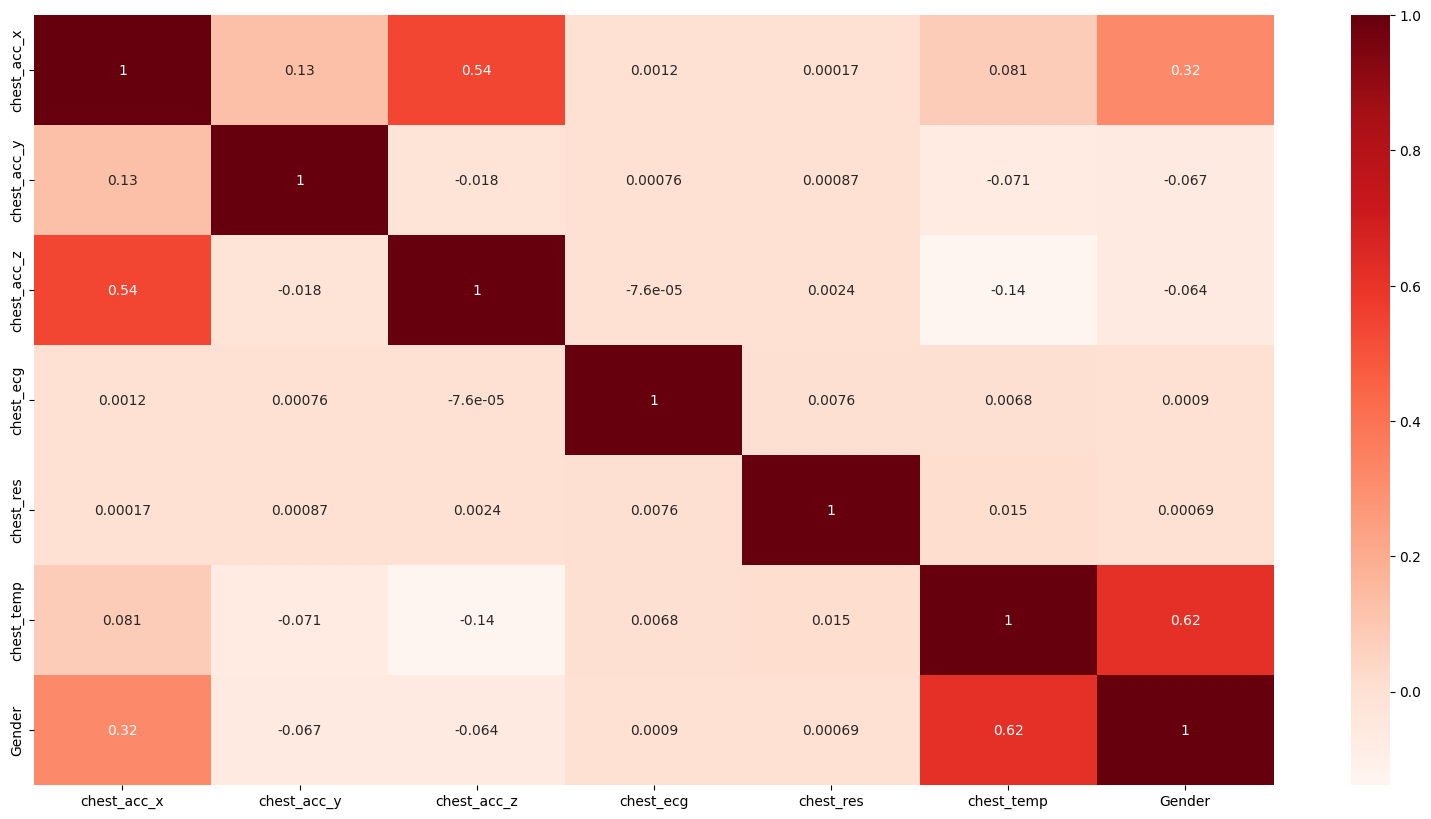

             chest_acc_x  chest_acc_y  chest_acc_z  chest_ecg  chest_res  \
chest_acc_x     1.000000     0.128690     0.539460   0.001210   0.000168   
chest_acc_y     0.128690     1.000000    -0.017971   0.000761   0.000866   
chest_acc_z     0.539460    -0.017971     1.000000  -0.000076   0.002444   
chest_ecg       0.001210     0.000761    -0.000076   1.000000   0.007618   
chest_res       0.000168     0.000866     0.002444   0.007618   1.000000   
chest_temp      0.081287    -0.071388    -0.138431   0.006752   0.014706   
Gender          0.317527    -0.067065    -0.064452   0.000904   0.000691   

             chest_temp    Gender  
chest_acc_x    0.081287  0.317527  
chest_acc_y   -0.071388 -0.067065  
chest_acc_z   -0.138431 -0.064452  
chest_ecg      0.006752  0.000904  
chest_res      0.014706  0.000691  
chest_temp     1.000000  0.616022  
Gender         0.616022  1.000000  


In [15]:
X = df.drop('label', axis=1)
X = X.drop('Subject ID', axis=1)

cor = X.corr()
plt.rcParams["figure.figsize"] = (20, 10)
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

correlations = X.corr()
print(correlations)

In [16]:
df.replace(to_replace="male", value=0, inplace=True)
df.replace(to_replace="Female", value=1, inplace=True)
df.replace(to_replace="female", value=1, inplace=True)

In [17]:
df["Gender"].value_counts()

0    9494800
1    7489300
Name: Gender, dtype: int64

In [26]:
X = df.drop('label', axis=1)
X = X.drop('Subject ID', axis=1)
y = df['label']

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1)
print(X_train)  
print(y_train)

          chest_acc_x  chest_acc_y  chest_acc_z  chest_ecg  chest_res  \
3642203        0.8862       0.0660      -0.1150  -0.282623  -4.705811   
1944848        0.9172      -0.0854      -0.0754  -0.011856  -0.650024   
3237607        0.8952      -0.0230      -0.2322  -0.100067  -6.416321   
3624045        0.9098      -0.1062       0.0270   0.001602  -1.878357   
14367323       0.7736       0.1418      -0.4978   0.000046   5.015564   
...               ...          ...          ...        ...        ...   
1828263        0.9384       0.0102      -0.1866  -0.664627   5.223083   
5676560        0.9116       0.0266       0.0074  -0.011353  -1.042175   
14250282       0.8846      -0.2862       0.0974   0.000504  -1.260376   
10426760       0.8710      -0.0688      -0.3234   0.027237   4.389954   
10296438       0.7138       0.0126      -0.6386   0.047791   0.445557   

          chest_temp  Gender  
3642203    35.035889       1  
1944848    34.707733       1  
3237607    35.059082       1  

In [28]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

In [30]:
df

,chest_acc_x,chest_acc_y,chest_acc_z,chest_ecg,chest_res,chest_temp,label,Subject ID,Gender
0,0.7674,0.4226,1.7662,0.020096,2.120972,33.520264,0.0,11,1
1,0.7326,0.2878,1.7234,0.036850,2.113342,33.494537,0.0,11,1
2,0.6894,0.1146,1.5550,0.053650,2.122498,33.508148,0.0,11,1
3,0.6646,-0.0626,1.3322,0.052780,2.125549,33.491516,0.0,11,1
4,0.6590,-0.2322,1.0834,0.035751,2.131653,33.524780,0.0,11,1
...,...,...,...,...,...,...,...,...,...
16862667,0.6554,0.0192,-0.6834,0.478180,2.293396,35.581635,4.0,8,1
16862668,0.6538,0.0200,-0.6806,0.262756,2.265930,35.511627,4.0,8,1
16862669,0.6542,0.0222,-0.6806,0.103363,2.253723,35.586304,4.0,8,1
16862670,0.6532,0.0222,-0.6818,-0.013000,2.250671,35.597229,4.0,8,1


In [31]:
df.to_csv('D:\\BCU Final\\ML\\Dataset\\Wesad Acc\\datasrc\\features.csv', index=False)

In [30]:
df

,chest_acc_x,chest_acc_y,chest_acc_z,chest_ecg,chest_res,chest_temp,label,Subject ID,Gender
0,0.7674,0.4226,1.7662,0.020096,2.120972,33.520264,0.0,11,1
1,0.7326,0.2878,1.7234,0.036850,2.113342,33.494537,0.0,11,1
2,0.6894,0.1146,1.5550,0.053650,2.122498,33.508148,0.0,11,1
3,0.6646,-0.0626,1.3322,0.052780,2.125549,33.491516,0.0,11,1
4,0.6590,-0.2322,1.0834,0.035751,2.131653,33.524780,0.0,11,1
...,...,...,...,...,...,...,...,...,...
16984095,0.9150,-0.0078,-0.0558,-0.022842,0.733948,35.528717,0.0,8,1
16984096,0.9160,-0.0082,-0.0586,-0.024216,0.730896,35.519409,0.0,8,1
16984097,0.9138,-0.0050,-0.0602,-0.021835,0.727844,35.432373,0.0,8,1
16984098,0.9138,-0.0058,-0.0586,-0.016296,0.703430,35.547394,0.0,8,1


In [32]:
rfc = RandomForestClassifier(random_state=1, n_estimators=10000, max_depth=15)

sklearn_selector = RFE(rfc, n_features_to_select=6)
X_trans = sklearn_selector.fit_transform(X_train, y_train)

print("Ranking: ", sklearn_selector.ranking_)

selected_features = pd.DataFrame({'Feature': list(X_train.columns),
                                     'Ranking': sklearn_selector.ranking_})

print("\nSelected Features")
print(selected_features.sort_values(by='Ranking').head(n=6))

X_important_train = sklearn_selector.transform(np.array(X_train))
X_important_test = sklearn_selector.transform(np.array(X_test))


rf_sklearn = RandomForestClassifier(random_state=1, n_estimators=1000, max_depth=15)
rf_sklearn.fit(X_important_train, y_train)

print("\nAccuracy Score")
accuracy_score(y_test, rf_sklearn.predict(X_important_test))